In [266]:
# 778. Swim in Rising Water
# You are given an n x n integer matrix grid where each value grid[i][j] represents the elevation at that point (i, j).
# It starts raining, and water gradually rises over time. 
# At time t, the water level is t, meaning any cell with elevation less than equal to t is submerged or reachable.
# You can swim from a square to another 4-directionally adjacent square if and only if the elevation of both squares individually are at most t. 
# You can swim infinite distances in zero time. Of course, you must stay within the boundaries of the grid during your swim.
# Return the minimum time until you can reach the bottom right square (n - 1, n - 1) if you start at the top left square (0, 0).
# Input: grid = [[0,2],[1,3]]
# Output: 3

# Explanation:
# At time 0, you are in grid location (0, 0) with elevation 0.
# You cannot go anywhere else because 4-directionally adjacent neighbors have a higher elevation than t = 0.
# You cannot reach point (1, 1) until time 3.
# When the time is 3, we can swim anywhere inside the grid.

In [267]:
import heapq
from typing import List

class Solution:
    def swimInWater(self, grid: List[List[int]]) -> int:
        # Get the grid size (grid is n x n)
        n = len(grid)
        
        # Define movement directions: right, down, left, up
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        
        # Initialize min-heap with starting position and its elevation
        # Format: (elevation_value, row_index, column_index)
        min_heap = [(grid[0][0], 0, 0)]
        
        # Keep track of visited cells to avoid cycles
        visited = set([(0, 0)])
        
        # Result will store the maximum elevation encountered (minimum time required)
        result = 0
        
        # Continue processing until heap is empty
        while min_heap:
            # Extract the cell with minimum elevation from heap
            elevation, x, y = heapq.heappop(min_heap)
            
            # Update result to the maximum elevation encountered so far
            # This represents the water level needed to reach current position
            result = max(result, elevation)
            
            # Check if we've reached the destination (bottom-right corner)
            if x == n - 1 and y == n - 1:
                return result
            
            # Explore all 4 adjacent cells
            for dx, dy in directions:
                # Calculate coordinates of adjacent cell
                nx, ny = x + dx, y + dy
                
                # Check if adjacent cell is within grid boundaries and not visited
                if 0 <= nx < n and 0 <= ny < n and (nx, ny) not in visited:
                    # Mark the cell as visited
                    visited.add((nx, ny))
                    
                    # Add the cell to heap with its elevation value
                    heapq.heappush(min_heap, (grid[nx][ny], nx, ny))
        
        # Return the result (this line should not be reached with valid input)
        return result
    
# Example usage:
solution = Solution()  # Create an instance of the Solution class
grid = [[0,2],[1,3]]  # Define the test grid
print(solution.swimInWater(grid))  # Output: 3 - Call the method and print result

3


# --- Dijkstra's Algorithm Explained ---

## What is Dijkstra's Algorithm?

Dijkstra's Algorithm is a **greedy algorithm** that finds the **shortest path** between a starting node and all other nodes in a weighted graph.

## Core Concept:
- **Goal**: Find the path with minimum total distance/weight from start to destination
- **Approach**: Always explore the node with the smallest current distance first
- **Data Structure**: Uses a **priority queue (min-heap)** to efficiently get the next best node

## Algorithm Steps:

1. **Initialize** all distances to infinity except start node (distance = 0)
2. **Create min-heap** with (distance, node) pairs, starting with (0, start_node)
3. **Maintain visited set** to avoid reprocessing nodes
4. **Loop until heap is empty**:
   - Extract node with minimum distance
   - Update distances for all unvisited neighbors
   - Add neighbors to heap if shorter path found
5. **Terminate** when destination reached

## Connection to Swim in Rising Water:

```python
# Dijkstra's mapping to this problem:
# - "Distance" = Maximum elevation encountered so far
# - "Node" = Grid cell position (x, y)
# - "Weight" = Cell elevation value
# - "Shortest path" = Path with minimum maximum elevation
```

## Why Perfect for This Problem:

1. **Bottleneck Optimization**: We need to minimize the maximum elevation (water level)
2. **Greedy Choice**: Always exploring lower elevations first ensures optimal path
3. **Shortest Path Analogy**: "Shortest" = "lowest water level needed"

## Key Properties:
- **Time Complexity**: O(E log V) where E = edges, V = vertices
- **Space Complexity**: O(V) for visited set and heap
- **Guarantees**: Finds optimal solution for non-negative weights
- **Limitation**: Doesn't work with negative edge weights

## Algorithm in This Problem:
- **Nodes**: Grid cells (i, j)
- **Edges**: 4-directional adjacency
- **Edge Weight**: Maximum of current elevation and neighbor elevation
- **Goal**: Minimize the maximum elevation encountered from (0,0) to (n-1,n-1)

The algorithm is perfect for problems where you need to find a path that minimizes some "cost" metric - in this case, the water level needed to swim!

In [268]:
# Step-by-Step Visualization of Dijkstra's Algorithm

import heapq
from typing import List

def visualize_swim_in_water(grid: List[List[int]]) -> int:
    """Swim in Rising Water with detailed step-by-step visualization"""
    n = len(grid)
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    min_heap = [(grid[0][0], 0, 0)]
    visited = set([(0, 0)])
    result = 0
    
    print("🏊‍♂️ Swim in Rising Water - Step-by-Step Visualization")
    print("=" * 60)
    print(f"Grid: {grid}")
    print(f"Start: (0,0) with elevation {grid[0][0]}")
    print(f"Destination: ({n-1},{n-1}) with elevation {grid[n-1][n-1]}")
    print()
    
    step = 1
    while min_heap:
        print(f"📍 Step {step}: Processing heap {sorted(min_heap)}")
        elevation, x, y = heapq.heappop(min_heap)
        print(f"   Extract: ({x},{y}) with elevation {elevation}")
        
        result = max(result, elevation)
        print(f"   Water Level: max({result}, {elevation}) = {result}")
        
        if x == n - 1 and y == n - 1:
            print(f"   🎯 Destination reached! Final water level: {result}")
            return result
        
        print(f"   Current visited: {visited}")
        print("   Exploring neighbors:")
        
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < n and (nx, ny) not in visited:
                visited.add((nx, ny))
                heapq.heappush(min_heap, (grid[nx][ny], nx, ny))
                print(f"     → Add ({nx},{ny}) elevation {grid[nx][ny]} to heap")
        
        print(f"   Updated heap: {sorted(min_heap)}")
        print(f"   Updated visited: {visited}")
        print("-" * 40)
        step += 1
    
    return result

# Test the visualization
print("🚀 Running Step-by-Step Visualization:")
print("=" * 60)
grid = [[0,2],[1,3]]
visualize_swim_in_water(grid)

# --- Visualization Summary ---
print("""
📊 VISUALIZATION SUMMARY:
═══════════════════════════════════════════════════════════

🏁 Starting Point: (0,0) with elevation 0
🎯 Ending Point: (1,1) with elevation 3

🛣️ Path Found: (0,0) → (1,0) → (1,1)
📈 Elevations: [0, 1, 3]
💧 Final Water Level: 3

⚡ Key Algorithm Behaviors:
   • Always selects cell with smallest elevation from heap
   • Water level = maximum elevation encountered so far
   • Greedy choice ensures optimal solution
   • Terminates when destination is reached

🧠 Why Dijkstra's Works Here:
   • "Distance" = Maximum elevation on path
   • "Weight" = Cell elevation values
   • "Shortest path" = Path with minimum maximum elevation
   • Min-heap ensures we always explore lowest available elevation first
""")

🚀 Running Step-by-Step Visualization:
🏊‍♂️ Swim in Rising Water - Step-by-Step Visualization
Grid: [[0, 2], [1, 3]]
Start: (0,0) with elevation 0
Destination: (1,1) with elevation 3

📍 Step 1: Processing heap [(0, 0, 0)]
   Extract: (0,0) with elevation 0
   Water Level: max(0, 0) = 0
   Current visited: {(0, 0)}
   Exploring neighbors:
     → Add (0,1) elevation 2 to heap
     → Add (1,0) elevation 1 to heap
   Updated heap: [(1, 1, 0), (2, 0, 1)]
   Updated visited: {(0, 1), (1, 0), (0, 0)}
----------------------------------------
📍 Step 2: Processing heap [(1, 1, 0), (2, 0, 1)]
   Extract: (1,0) with elevation 1
   Water Level: max(1, 1) = 1
   Current visited: {(0, 1), (1, 0), (0, 0)}
   Exploring neighbors:
     → Add (1,1) elevation 3 to heap
   Updated heap: [(2, 0, 1), (3, 1, 1)]
   Updated visited: {(0, 1), (1, 0), (1, 1), (0, 0)}
----------------------------------------
📍 Step 3: Processing heap [(2, 0, 1), (3, 1, 1)]
   Extract: (0,1) with elevation 2
   Water Level: max(2, 

Grid 1: [[0,2],[1,3]]


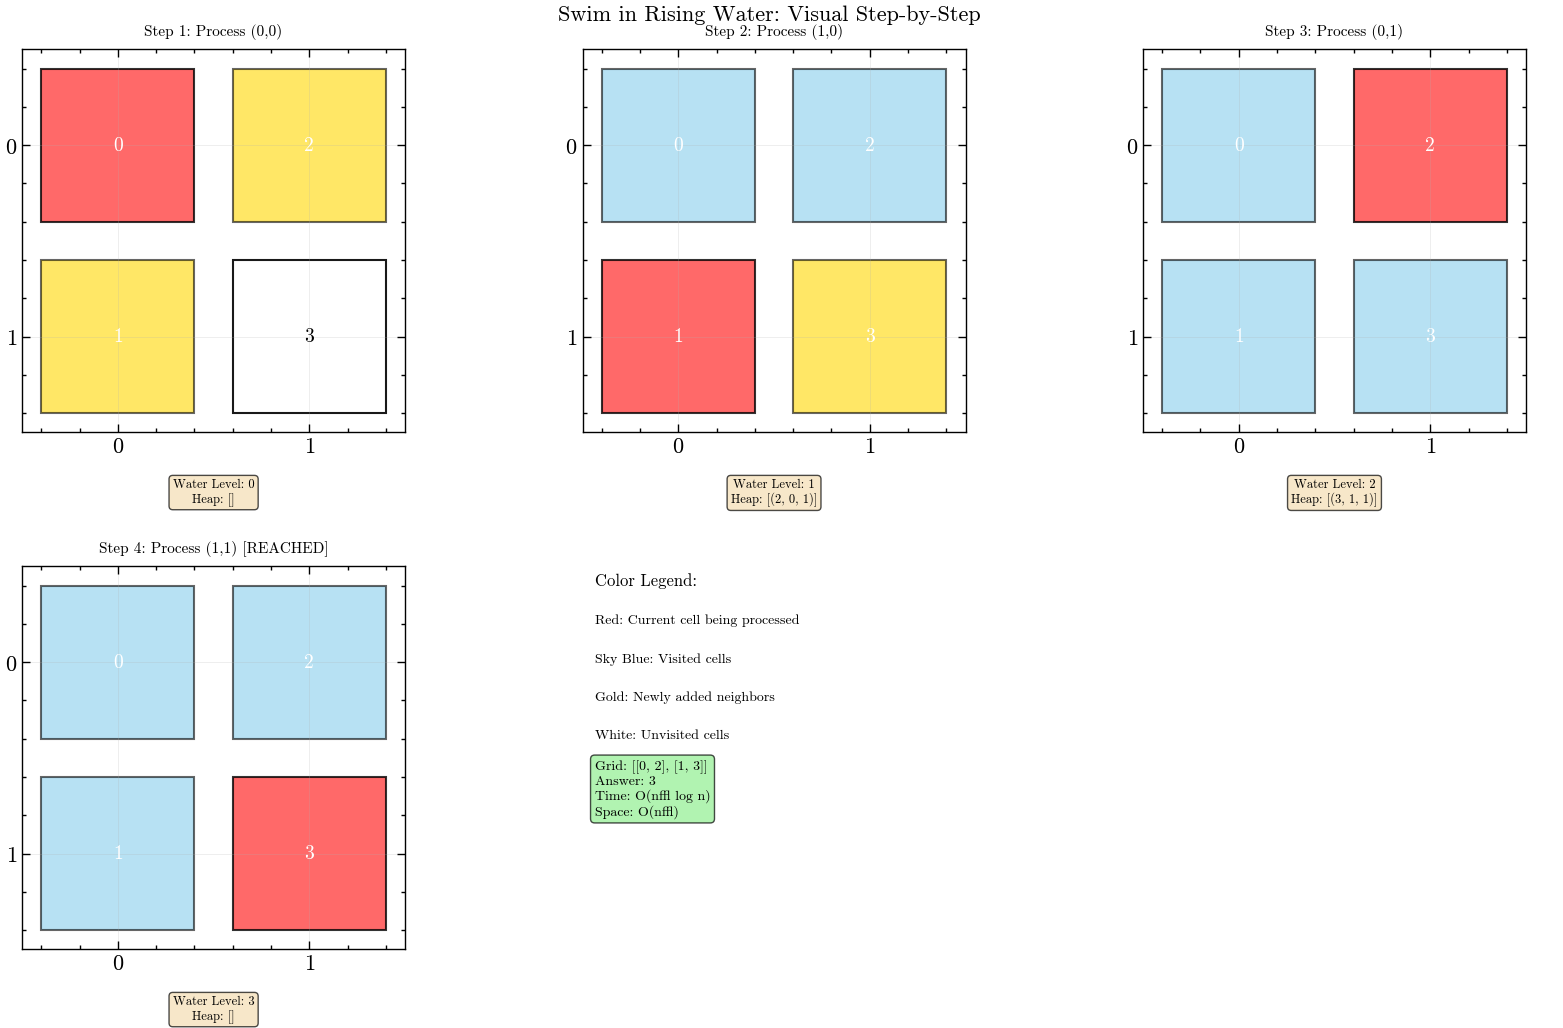

3

In [273]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import heapq
from typing import List

def visualize_swim_graphical(grid: List[List[int]]):
    """Create clean, professional step-by-step visualization"""
    n = len(grid)
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    min_heap = [(grid[0][0], 0, 0)]
    visited = set([(0, 0)])
    result = 0

    # Store steps for visualization
    steps = []

    while min_heap:
        elevation, x, y = heapq.heappop(min_heap)
        result = max(result, elevation)

        # Record this step
        step_info = {
            'current': (x, y),
            'elevation': elevation,
            'water_level': result,
            'heap': list(min_heap).copy(),
            'visited': visited.copy(),
            'neighbors': []
        }

        if x == n - 1 and y == n - 1:
            step_info['reached'] = True
            steps.append(step_info)
            break

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < n and (nx, ny) not in visited:
                visited.add((nx, ny))
                heapq.heappush(min_heap, (grid[nx][ny], nx, ny))
                step_info['neighbors'].append((nx, ny))

        steps.append(step_info)

    # Calculate layout - show all steps plus legend
    num_steps = len(steps)
    # Determine grid layout: aim for 3 columns, calculate rows needed
    cols = 3
    # Add 1 for legend panel
    total_panels = num_steps + 1
    rows = (total_panels + cols - 1) // cols  # Ceiling division
    
    # Create clean visualization with adjustable size
    fig_width = 16 if n <= 3 else 18
    fig_height = rows * (5 if n <= 3 else 6)
    fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))
    fig.suptitle('Swim in Rising Water: Visual Step-by-Step', fontsize=16, fontweight='bold', y=0.995)
    
    # Flatten axes array for easier indexing
    if rows == 1:
        axes = axes.reshape(1, -1)
    axes_flat = axes.flatten()

    for idx, step in enumerate(steps):
        ax = axes_flat[idx]
        ax.set_xlim(-0.5, n - 0.5)
        ax.set_ylim(-0.5, n - 0.5)
        ax.set_aspect('equal')
        ax.invert_yaxis()
        
        # Clean title
        title = f'Step {idx + 1}: Process ({step["current"][0]},{step["current"][1]})'
        if step.get('reached', False):
            title += ' [REACHED]'
        ax.set_title(title, fontweight='bold', fontsize=11, pad=20 if n > 3 else 10)
        
        ax.set_xticks(range(n))
        ax.set_yticks(range(n))
        ax.grid(True, alpha=0.3, linewidth=0.5)

        # Draw grid with clean colors
        for i in range(n):
            for j in range(n):
                # Clean color logic
                if (i, j) == step['current']:
                    color = '#ff4444'  # Clean red
                    alpha = 0.8
                elif (i, j) in step['visited']:
                    color = '#87CEEB'  # Sky blue
                    alpha = 0.6
                elif (i, j) in step['neighbors']:
                    color = '#FFD700'  # Gold
                    alpha = 0.6
                else:
                    color = 'white'
                    alpha = 0.9

                # Draw clean cell
                rect = patches.Rectangle((j - 0.4, i - 0.4), 0.8, 0.8,
                                        linewidth=1.5, edgecolor='black',
                                        facecolor=color, alpha=alpha)
                ax.add_patch(rect)

                # Add elevation text with better contrast
                text_color = 'white' if color in ['#ff4444', '#87CEEB', '#FFD700'] else 'black'
                font_size = 14 if n <= 3 else 12
                ax.text(j, i, str(grid[i][j]), ha='center', va='center',
                       fontsize=font_size, fontweight='bold', color=text_color)

        # Add clean info text box with better positioning
        info_text = f'Water Level: {step["water_level"]}\nHeap: {sorted(step["heap"][:3])}'
        ax.text(0.5, -0.12, info_text, ha='center', va='top', fontsize=9,
               transform=ax.transAxes,
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

    # Add color legend in the next available panel
    legend_ax = axes_flat[num_steps]
    legend_ax.axis('off')
    
    # Clean legend title
    legend_ax.text(0.1, 0.95, 'Color Legend:', fontsize=12, fontweight='bold',
                   transform=legend_ax.transAxes)
    
    # Clean legend items - adjusted y positions
    legend_items = [
        ('Red', 'Current cell being processed', 0.85),
        ('Sky Blue', 'Visited cells', 0.75),
        ('Gold', 'Newly added neighbors', 0.65),
        ('White', 'Unvisited cells', 0.55)
    ]
    
    for i, (color_name, description, y_pos) in enumerate(legend_items):
        legend_ax.text(0.1, y_pos, f'{color_name}: {description}', fontsize=10,
                      transform=legend_ax.transAxes)
    
    # Clean result section - adjusted position
    result_text = f'Grid: {grid}\n'
    result_text += f'Answer: {result}\n'
    result_text += f'Time: O(n² log n)\n'
    result_text += f'Space: O(n²)'
    
    legend_ax.text(0.1, 0.35, result_text, fontsize=10,
                  transform=legend_ax.transAxes,
                  bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    
    # Hide any remaining empty panels
    for idx in range(num_steps + 1, len(axes_flat)):
        axes_flat[idx].axis('off')

    plt.tight_layout()
    # Adjust subplot spacing to prevent overlap
    plt.subplots_adjust(hspace=0.35, wspace=0.25, top=0.95, bottom=0.05)
    plt.show()

    return result

# Test the clean graphical visualization
grid1 = [[0,2],[1,3]]
print("Grid 1: [[0,2],[1,3]]")
print("="*50)
visualize_swim_graphical(grid1)


Grid 2: Larger 5x5 grid


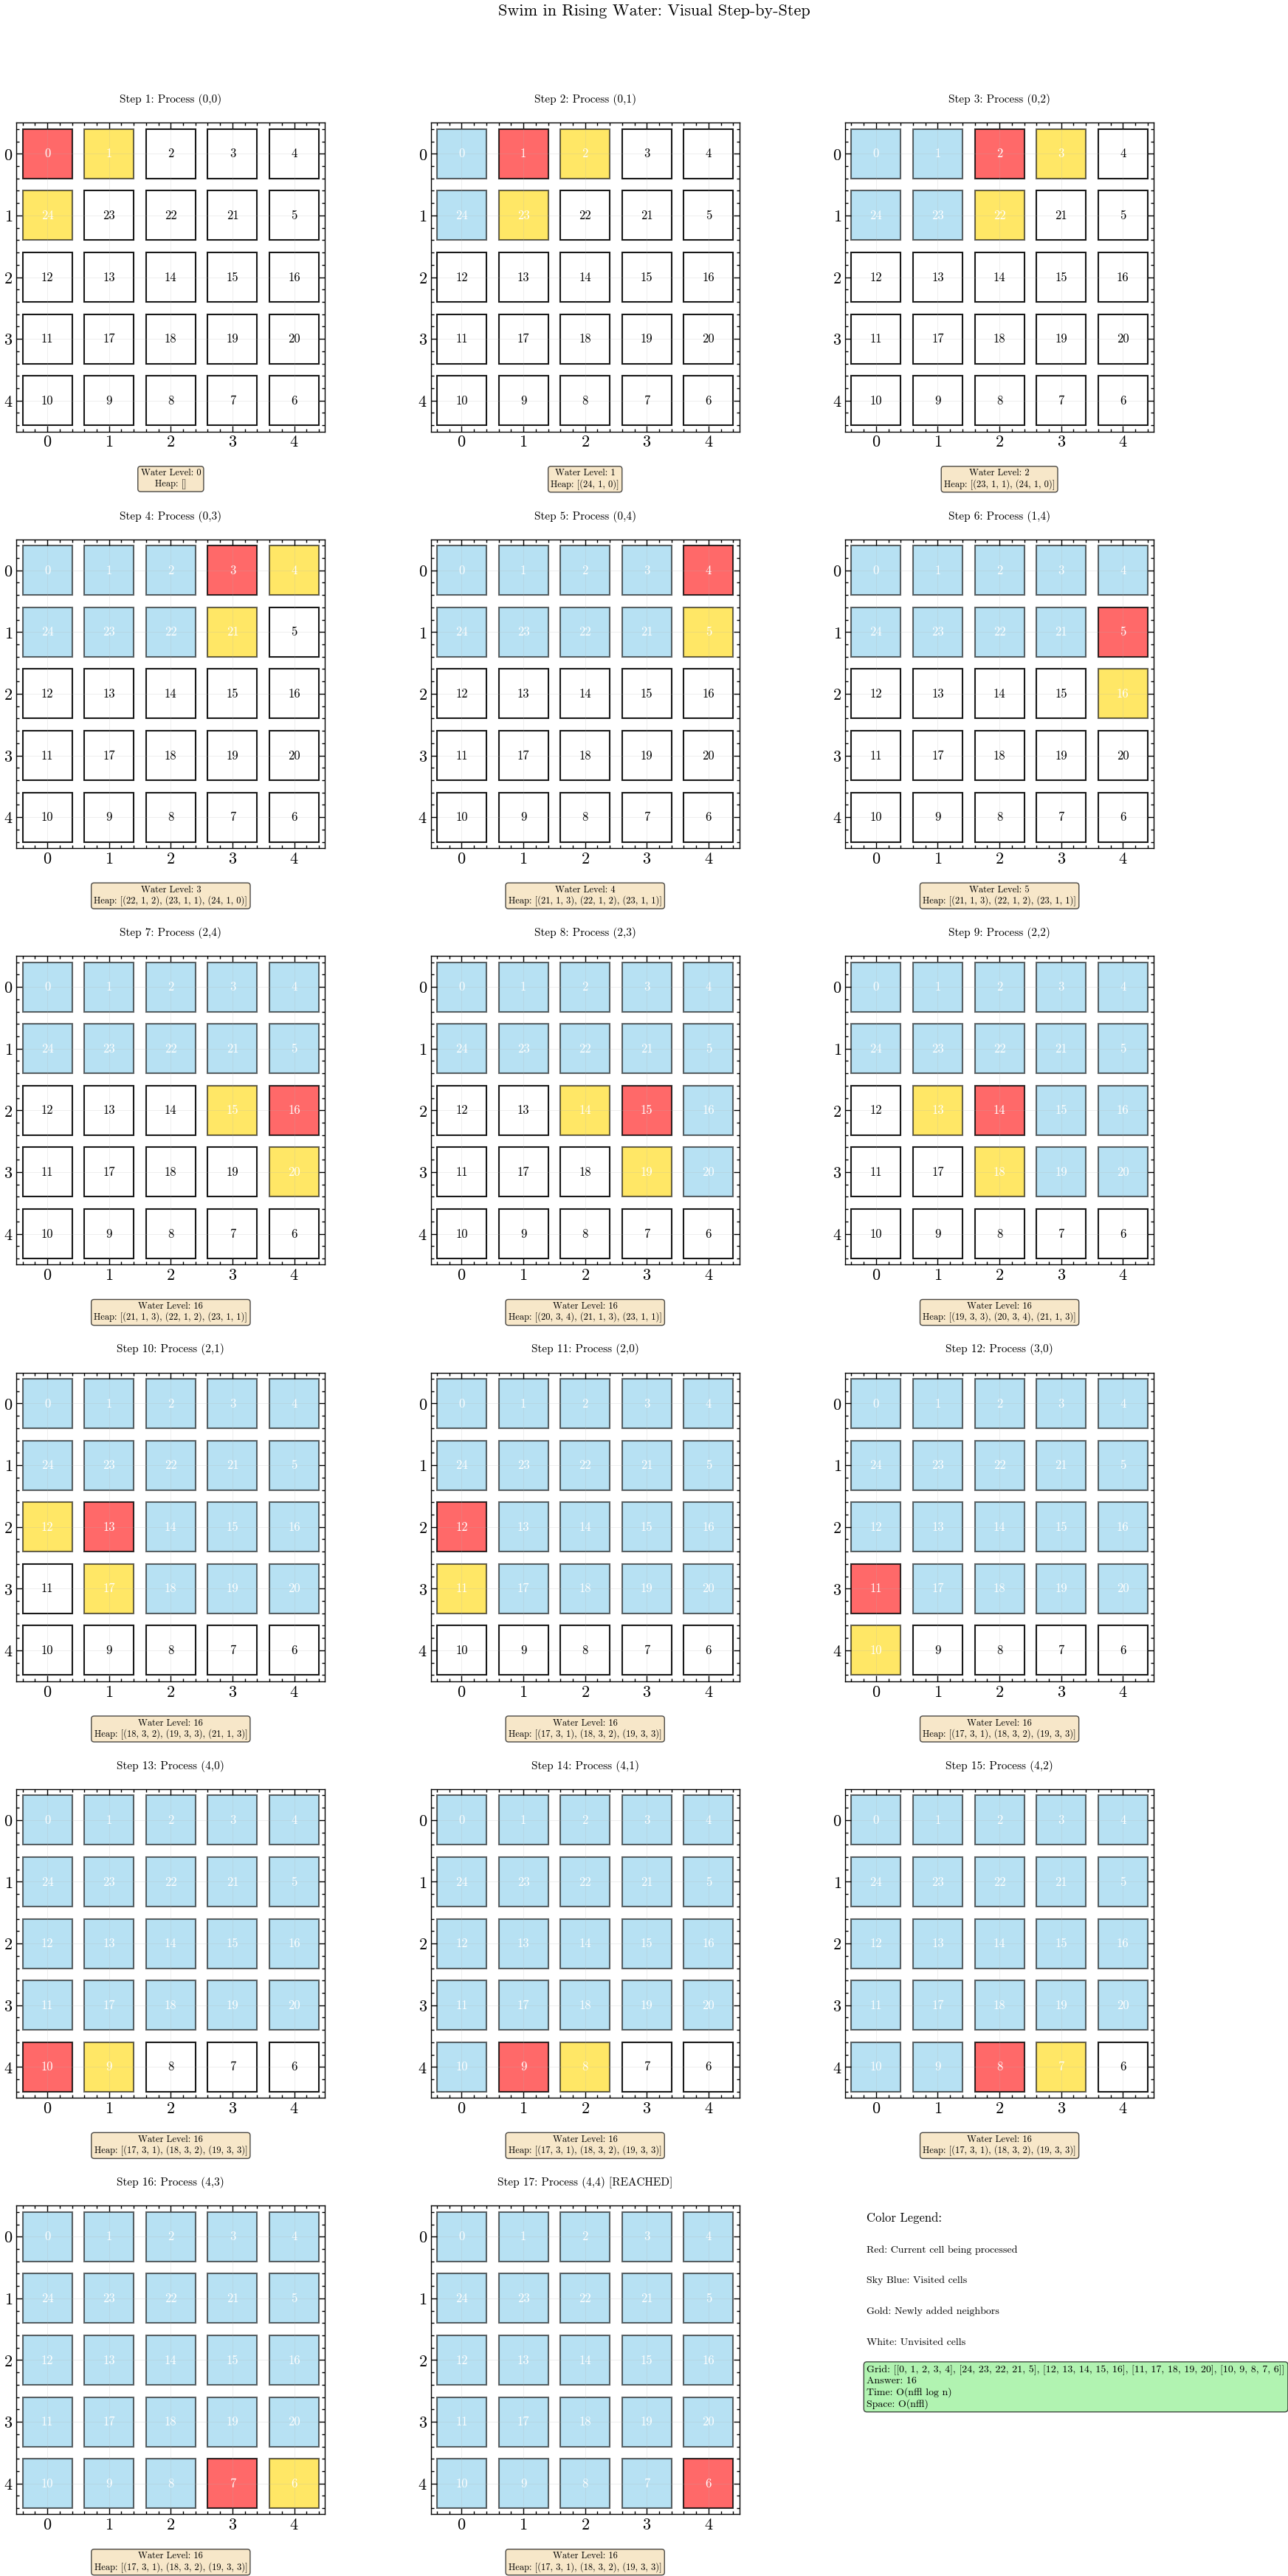

16

In [274]:
# More complex example with 3x3 grid
grid2 = [[0,1,2,3,4],[24,23,22,21,5],[12,13,14,15,16],[11,17,18,19,20],[10,9,8,7,6]]

print("\n" + "="*60)
print("Grid 2: Larger 5x5 grid")
print("="*60)
visualize_swim_graphical(grid2)


Enhanced 3D Visualization - Grid 1: [[0,2],[1,3]]


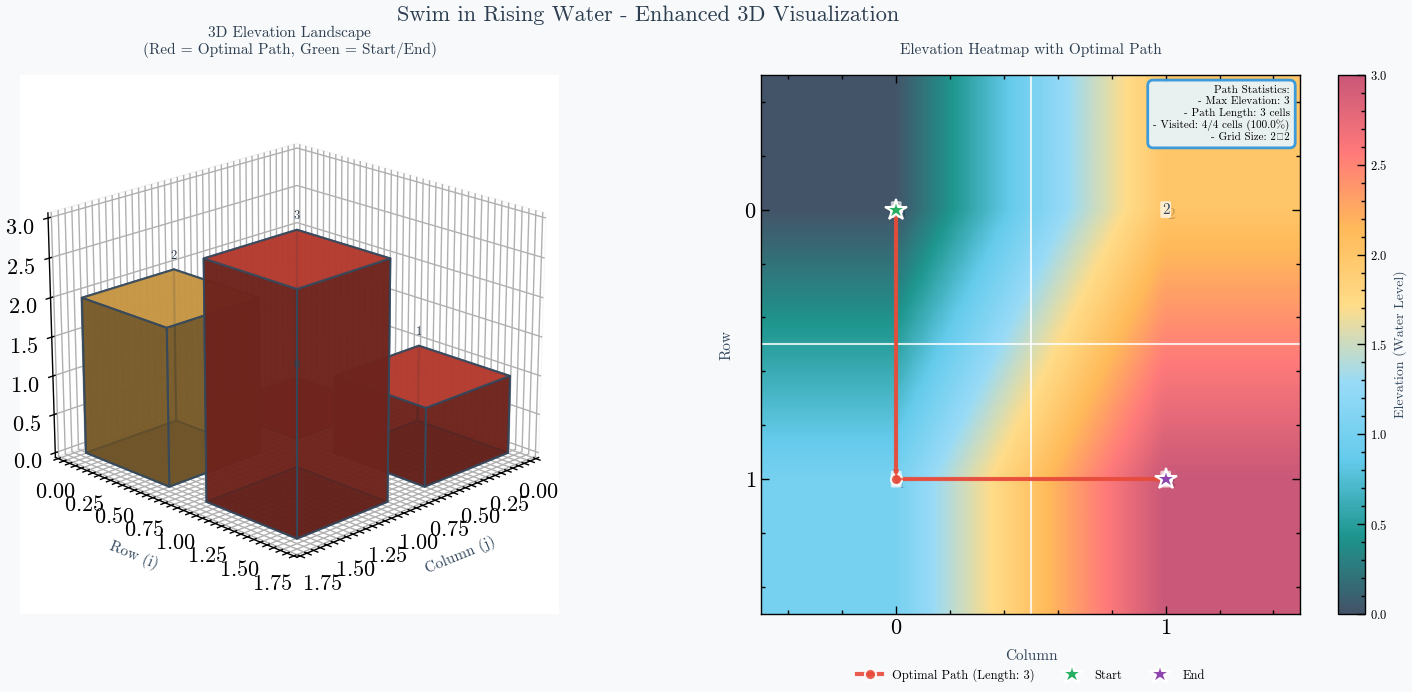

Enhanced 3D Visualization Results
Optimal Path: (0,0) → (1,0) → (1,1)
Elevations: [0, 1, 3]
Maximum Elevation (Answer): 3
Path Length: 3 cells
Cells Explored: 4/4 (100.0%)
Time Complexity: O(n² log n)
Space Complexity: O(n²)


In [271]:
# Enhanced 3D Visualization showing elevation as height with better aesthetics
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'no-latex'])

def create_custom_colormap():
    """Create a beautiful custom colormap for elevations"""
    colors = ['#2E4057', '#048A81', '#54C6EB', '#8DD7F7', '#FFD97D', '#FFB347', '#FF6B6B', '#C44569']
    n_bins = 256
    cmap = LinearSegmentedColormap.from_list('water_level', colors, N=n_bins)
    return cmap

def visualize_3d_grid(grid: List[List[int]]):
    """Create enhanced 3D visualization with beautiful aesthetics"""
    n = len(grid)
    
    # Run algorithm to get path
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    min_heap = [(grid[0][0], 0, 0)]
    visited = set([(0, 0)])
    path = [(0, 0)]
    parent = {}
    
    while min_heap:
        elevation, x, y = heapq.heappop(min_heap)
        
        if x == n - 1 and y == n - 1:
            # Reconstruct path
            current = (x, y)
            path = []
            while current in parent:
                path.append(current)
                current = parent[current]
            path.append((0, 0))
            path = path[::-1]
            break
        
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < n and (nx, ny) not in visited:
                visited.add((nx, ny))
                parent[(nx, ny)] = (x, y)
                heapq.heappush(min_heap, (grid[nx][ny], nx, ny))
    
    # Enhanced figure setup with reduced spacing
    fig = plt.figure(figsize=(18, 7))
    fig.patch.set_facecolor('#f8f9fa')
    fig.suptitle('Swim in Rising Water - Enhanced 3D Visualization', 
                 fontsize=16, fontweight='bold', color='#2c3e50', y=0.98)
    
    # Create custom colormap
    cmap = create_custom_colormap()
    
    # Plot 1: Enhanced 3D bars with gradient colors
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.set_facecolor('#ffffff')
    
    # Prepare data for 3D bars
    xpos, ypos = [], []
    zpos = []
    dx = dy = 0.7  # Slightly smaller bars for better visibility
    dz = []
    colors = []
    
    # Normalize elevations for color mapping
    max_elevation = max(max(row) for row in grid)
    min_elevation = min(min(row) for row in grid)
    norm = plt.Normalize(vmin=min_elevation, vmax=max_elevation)
    
    for i in range(n):
        for j in range(n):
            xpos.append(j)
            ypos.append(i)
            zpos.append(0)
            dz.append(grid[i][j])
            
            # Color based on elevation and path status
            if (i, j) in path:
                colors.append('#e74c3c')  # Red for path
            elif (i, j) == (0, 0) or (i, j) == (n-1, n-1):
                colors.append('#27ae60')  # Green for start/end
            else:
                # Use gradient colors for non-path cells
                colors.append(cmap(norm(grid[i][j])))
    
    # Enhanced 3D bar plot with better styling
    bars = ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, 
                     color=colors, alpha=0.85, 
                     edgecolor='#34495e', linewidth=1.5,
                     shade=True)
    
    # Enhanced axis styling
    ax1.set_xlabel('Column (j)', fontsize=11, fontweight='semibold', color='#34495e', labelpad=8)
    ax1.set_ylabel('Row (i)', fontsize=11, fontweight='semibold', color='#34495e', labelpad=8)
    ax1.set_zlabel('Elevation (Water Level)', fontsize=11, fontweight='semibold', color='#34495e', labelpad=8)
    
    # Better title with more padding
    ax1.set_title('3D Elevation Landscape\n(Red = Optimal Path, Green = Start/End)', 
                 fontweight='bold', fontsize=11, color='#2c3e50', pad=15)
    
    # Enhanced viewing angle and styling
    ax1.view_init(elev=20, azim=45)
    ax1.grid(True, alpha=0.3, linestyle='--')
    ax1.xaxis.pane.fill = False
    ax1.yaxis.pane.fill = False
    ax1.zaxis.pane.fill = False
    
    # Add elevation labels on top of bars
    for i in range(n):
        for j in range(n):
            ax1.text(j, i, grid[i][j] + 0.1, str(grid[i][j]), 
                    ha='center', va='bottom', fontsize=9, fontweight='bold',
                    color='#2c3e50')
    
    # Plot 2: Enhanced heatmap with path overlay and better styling
    ax2 = fig.add_subplot(122)
    ax2.set_facecolor('#ffffff')
    
    # Create enhanced heatmap with custom colormap
    im = ax2.imshow(grid, cmap=cmap, interpolation='bilinear', alpha=0.9)
    
    # Add grid lines for better cell separation
    for i in range(n):
        ax2.axhline(i - 0.5, color='white', linewidth=1.5, alpha=0.8)
        ax2.axvline(i - 0.5, color='white', linewidth=1.5, alpha=0.8)
    
    # Enhanced grid values with better styling
    for i in range(n):
        for j in range(n):
            # Enhanced text styling with shadows
            elevation_value = grid[i][j]
            normalized_val = norm(elevation_value)
            
            # Choose text color based on background
            if normalized_val > 0.7:
                text_color = 'white'
            elif normalized_val < 0.3:
                text_color = '#2c3e50'
            else:
                text_color = '#34495e'
            
            # Add shadow for better readability
            ax2.text(j + 0.02, i + 0.02, str(elevation_value),
                    ha="center", va="center", 
                    color='black', alpha=0.2, 
                    fontsize=11, fontweight='bold',
                    zorder=3)
            
            # Main text
            ax2.text(j, i, str(elevation_value),
                    ha="center", va="center", 
                    color=text_color, fontweight='bold', fontsize=11,
                    bbox=dict(boxstyle='round,pad=0.1', 
                             facecolor='white', alpha=0.7,
                             edgecolor='none'),
                    zorder=4)
    
    # Enhanced path visualization - draw before text boxes
    if len(path) > 1:
        path_x = [p[1] for p in path]
        path_y = [p[0] for p in path]
        
        # Draw path with enhanced styling
        ax2.plot(path_x, path_y, 'o-', linewidth=3, markersize=8, 
                color='#e74c3c', alpha=0.9,
                markeredgecolor='white', markeredgewidth=1.5,
                label=f'Optimal Path (Length: {len(path)})',
                zorder=5)
        
        # Add arrow indicators for path direction
        for i in range(len(path) - 1):
            dx = path_x[i+1] - path_x[i]
            dy = path_y[i+1] - path_y[i]
            if dx != 0 or dy != 0:
                ax2.annotate('', xy=(path_x[i+1], path_y[i+1]), 
                           xytext=(path_x[i], path_y[i]),
                           arrowprops=dict(arrowstyle='->', color='#e74c3c', 
                                         lw=1.5, alpha=0.8),
                           zorder=6)
    
    # Enhanced start and end markers
    ax2.plot(0, 0, '*', markersize=16, color='#27ae60', 
            label='Start', markeredgecolor='white', markeredgewidth=1.5, zorder=7)
    ax2.plot(n-1, n-1, '*', markersize=16, color='#8e44ad', 
            label='End', markeredgecolor='white', markeredgewidth=1.5, zorder=7)
    
    # Enhanced axis styling
    ax2.set_xticks(range(n))
    ax2.set_yticks(range(n))
    ax2.set_xlabel('Column', fontsize=11, fontweight='semibold', color='#34495e', labelpad=8)
    ax2.set_ylabel('Row', fontsize=11, fontweight='semibold', color='#34495e', labelpad=8)
    ax2.set_title('Elevation Heatmap with Optimal Path', 
                 fontweight='bold', fontsize=11, color='#2c3e50', pad=15)
    
    # Enhanced legend with proper z-order
    legend = ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), 
                       fontsize=9, framealpha=0.95,
                       fancybox=True, shadow=True, ncol=3)
    legend.get_frame().set_facecolor('#f8f9fa')
    legend.get_frame().set_edgecolor('#34495e')
    legend.set_zorder(10)  # Ensure legend is on top
    
    # Enhanced colorbar
    cbar = plt.colorbar(im, ax=ax2, label='Elevation (Water Level)', 
                       fraction=0.046, pad=0.06)
    cbar.ax.tick_params(labelsize=9)
    cbar.set_label('Elevation (Water Level)', fontsize=10, fontweight='semibold', color='#34495e')
    
    # Add statistics box with high z-order to be in front
    path_elevations = [grid[p[0]][p[1]] for p in path]
    max_water_level = max(path_elevations)
    total_cells = n * n
    visited_percentage = (len(visited) / total_cells) * 100
    
    stats_text = (f'Path Statistics:\n'
                 f'- Max Elevation: {max_water_level}\n'
                 f'- Path Length: {len(path)} cells\n'
                 f'- Visited: {len(visited)}/{total_cells} cells ({visited_percentage:.1f}%)\n'
                 f'- Grid Size: {n}×{n}')

    # Position stats box with high z-order to ensure it's in front
    ax2.text(0.98, 0.98, stats_text, transform=ax2.transAxes, 
            fontsize=8, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.5', 
                     facecolor='#e8f4f8', alpha=0.95,
                     edgecolor='#3498db', linewidth=2),
            zorder=15)  # Highest z-order to be in front
    
    # Manual positioning for precise control - format: [left, bottom, width, height]
    # Position 3D plot on left half with minimal margin
    #ax1.set_position([0.0, 0.1, 0.48, 0.75])
    # Position heatmap on right half with reduced width to leave room for colorbar
    # Width reduced to 0.40 to accommodate colorbar (total: 0.50 + 0.40 = 0.90, leaving 10% for colorbar)
    #ax2.set_position([0.50, 0.1, 0.40, 0.75])
    
    
    plt.show()
    
    # Enhanced summary output
    print("Enhanced 3D Visualization Results")
    print("=" * 60)
    print(f"Optimal Path: {' → '.join([f'({p[0]},{p[1]})' for p in path])}")
    print(f"Elevations: {path_elevations}")
    print(f"Maximum Elevation (Answer): {max_water_level}")
    print(f"Path Length: {len(path)} cells")
    print(f"Cells Explored: {len(visited)}/{total_cells} ({visited_percentage:.1f}%)")
    print(f"Time Complexity: O(n² log n)")
    print(f"Space Complexity: O(n²)")

# Test enhanced 3D visualization
print("\n" + "="*60)
print("Enhanced 3D Visualization - Grid 1: [[0,2],[1,3]]")
print("="*60)
visualize_3d_grid(grid1)


3D Visualization - Grid 2: 5x5 spiral grid


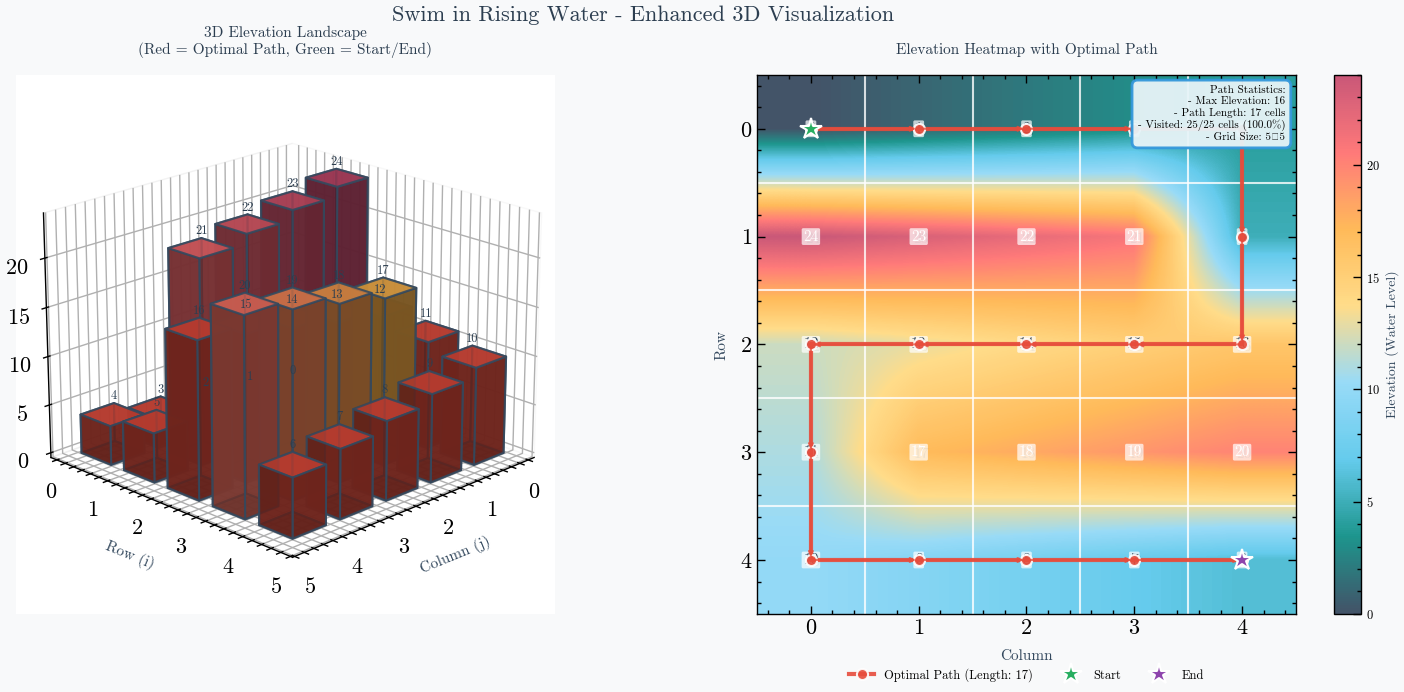

Enhanced 3D Visualization Results
Optimal Path: (0,0) → (0,1) → (0,2) → (0,3) → (0,4) → (1,4) → (2,4) → (2,3) → (2,2) → (2,1) → (2,0) → (3,0) → (4,0) → (4,1) → (4,2) → (4,3) → (4,4)
Elevations: [0, 1, 2, 3, 4, 5, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6]
Maximum Elevation (Answer): 16
Path Length: 17 cells
Cells Explored: 25/25 (100.0%)
Time Complexity: O(n² log n)
Space Complexity: O(n²)


In [272]:
# 3D visualization for the larger grid
print("\n" + "="*60)
print("3D Visualization - Grid 2: 5x5 spiral grid")
print("="*60)
visualize_3d_grid(grid2)